/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed i

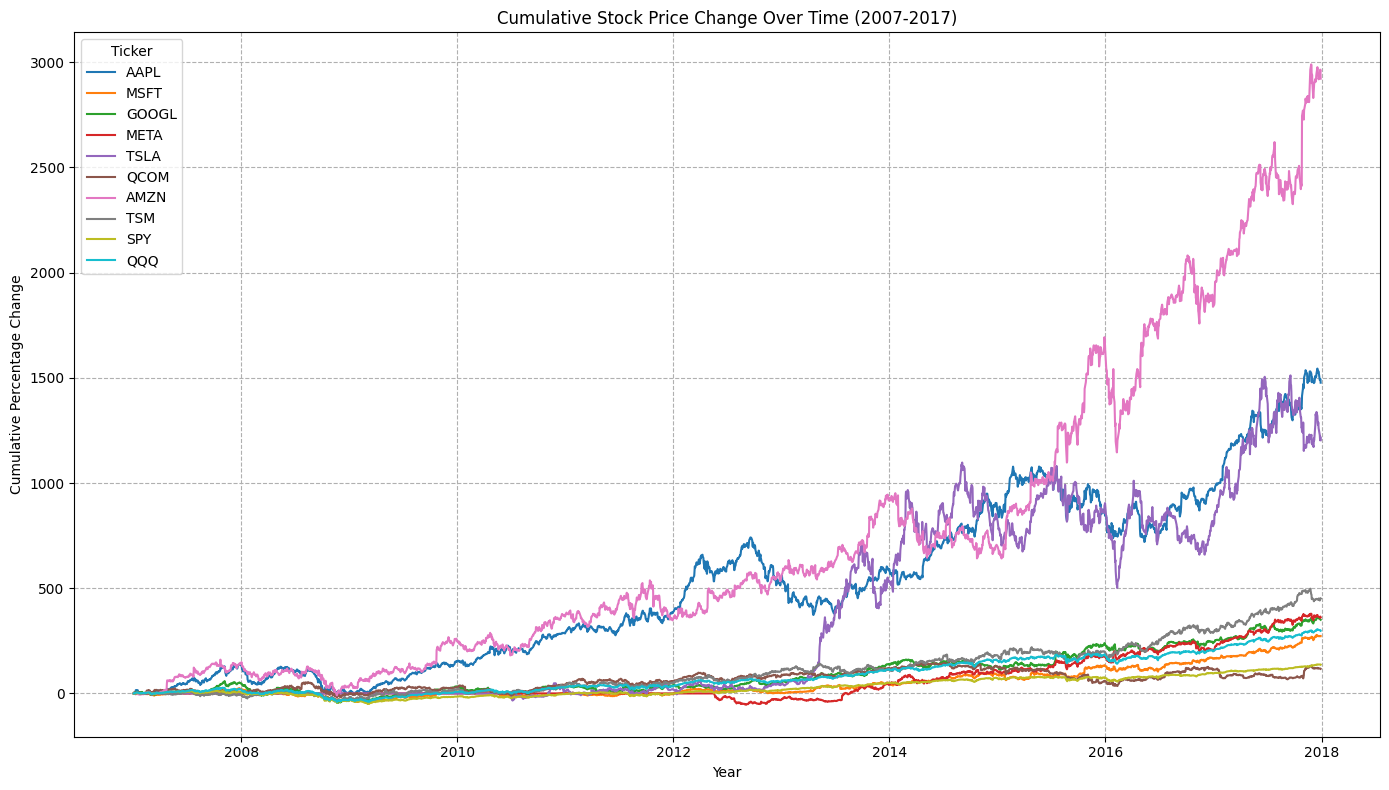

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for the companies and include an index for comparison
tickers = [
    "AAPL",
    "MSFT",
    "GOOGL",
    "META",
    "TSLA",
    "QCOM",
    "AMZN",
    "TSM",
    "SPY",
    "QQQ",
]  # Adjusted list for simplicity and availability
# Note: For Samsung (005930.KS) and Tencent (0700.HK), due to their market and possible data limitations, they might not fetch correctly for all users.

start_date = "2007-01-01"
end_date = "2017-12-31"


# Fetch historical data
def fetch_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)["Adj Close"]
    return data


try:
    price_data = fetch_data(tickers, start_date, end_date)
except Exception as e:
    print(f"Error fetching data: {e}")

# Calculate cumulative percentage change from the beginning of the period
price_change_cumulative = (
    price_data.pct_change().fillna(0).add(1).cumprod().sub(1).mul(100)
)

# Plotting
plt.figure(figsize=(14, 8))

for ticker in tickers:
    plt.plot(
        price_change_cumulative.index, price_change_cumulative[ticker], label=ticker
    )

plt.title("Cumulative Stock Price Change Over Time (2007-2017)")
plt.xlabel("Year")
plt.ylabel("Cumulative Percentage Change")
plt.legend(title="Ticker")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [14]:
# Adjust the start and end dates
start_date = "2009-01-01"
end_date = "2023-12-31"

# Assuming you have the fetch_data function as defined previously,
# fetch the adjusted data with the new date range
try:
    price_data = fetch_data(tickers, start_date, end_date)
except Exception as e:
    print(f"Error fetching data: {e}")

# Resample to get annual prices (year-end)
annual_prices = price_data.resample("Y").last()

# Calculate annual percentage change
annual_returns = annual_prices.pct_change().fillna(0).add(1).cumprod().sub(1).mul(100)

# Display the table
print("Cumulative Annual Stock Price Change (%) for 2009-2017")
print(annual_returns.round(2).to_string())


# Calculate simple annual percentage change (not cumulative)
simple_annual_returns = annual_prices.pct_change().mul(100)

# Display the table for annual growth rates
print()
print("Annual Growth Rate (%) Each Year from 2009 to 2017")
print(simple_annual_returns.round(2).to_string())

/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/vscode/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaInde

Cumulative Annual Stock Price Change (%) for 2009-2017
Ticker         AAPL     AMZN   GOOGL     META     MSFT    QCOM     QQQ     SPY      TSLA      TSM
Date                                                                                             
2009-12-31     0.00     0.00    0.00     0.00     0.00    0.00    0.00    0.00      0.00     0.00
2010-12-31    53.07    33.81   -4.20     0.00    -6.52    9.01   20.14   15.06      0.00    15.07
2011-12-31    92.19    28.68    4.18     0.00   -10.75   22.36   24.32   17.24      7.25    23.47
2012-12-31   154.78    86.49   14.10     0.00    -5.57   40.58   46.84   35.98     27.19    70.02
2013-12-31   175.34   196.45   80.77   105.30    36.26   72.01  100.63   79.92    464.89    77.62
2014-12-31   287.19   130.71   71.01   193.09    73.82   75.89  139.11  104.14    735.19   133.06
2015-12-31   275.52   402.45  150.73   293.16   113.26   22.01  161.68  106.66    801.28   144.44
2016-12-31   322.39   457.44  155.38   332.19   145.42   64.83 